# ch8_6 dataframe preprocess
이전 챕터에서는 카테고리형 변수 컬럼들의 인코딩을 적용해보았습니다. 그리고 dummy 컬럼을 활용하여 one-hot encoding을 적용하였습니다. 이번 챕터에서는 Age, Fare 처럼 연속형 확률 변수 컬럼들의 전처리 과정을 배워보겠습니다.

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("./data/titanic_train_preprocessed.csv")
df

,Unnamed: 0,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,1,-0.551366,0.432793,-0.473674,-0.879741,0.059160,0,0,0,1,0,0,1
1,1,2,1,0,0.654030,0.432793,-0.473674,1.361220,0.059160,0,1,0,0,1,0,0
2,2,3,1,0,-0.250017,-0.474545,-0.473674,-0.798540,-0.560975,1,0,0,1,0,0,1
3,3,4,1,0,0.428018,0.432793,-0.473674,1.062038,0.059160,0,0,0,1,1,0,0
4,4,5,0,1,0.428018,-0.474545,-0.473674,-0.784179,-0.560975,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,1,-0.174680,-0.474545,-0.473674,-0.333698,-0.560975,1,0,0,1,0,1,0
887,887,888,1,0,-0.777378,-0.474545,-0.473674,0.487082,-0.560975,1,0,0,1,1,0,0
888,888,889,0,0,-0.570201,0.432793,2.008933,0.242007,1.299429,0,0,0,1,0,0,1
889,889,890,1,1,-0.250017,-0.474545,-0.473674,0.487082,-0.560975,1,1,0,0,1,0,0


## 연속형 확률 변수 저처리
### 분포 확인
df.plot 함수를 활용하여 연속형 확률 변수들을 각각 plot 해보겠습니다.

<Axes: ylabel='Frequency'>

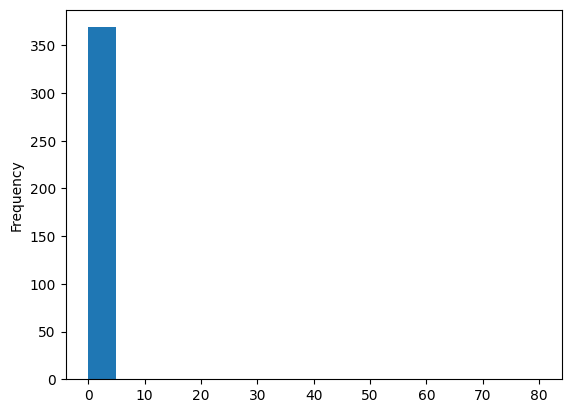

In [20]:
df["Age"].plot(kind="hist",bins=np.arange(0,85,5))

<Axes: ylabel='Frequency'>

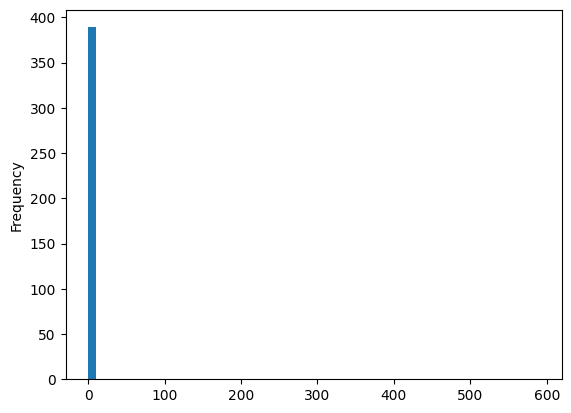

In [21]:
df["Fare"].plot(kind="hist",bins=np.arange(0,600,10))

### log scale
Fare의 경우엔 아래쪽으로 쏠려있고, 큰 값들이 보입니다. 이런 경우, log를 취해주면 우리가 좋아하는 종모양 분포에 가까워집니다. 0 값이 포함되어 있기 때문에 1을 더해주고 로그를 취해주는 np.log1p를 사용해보겠습니다.

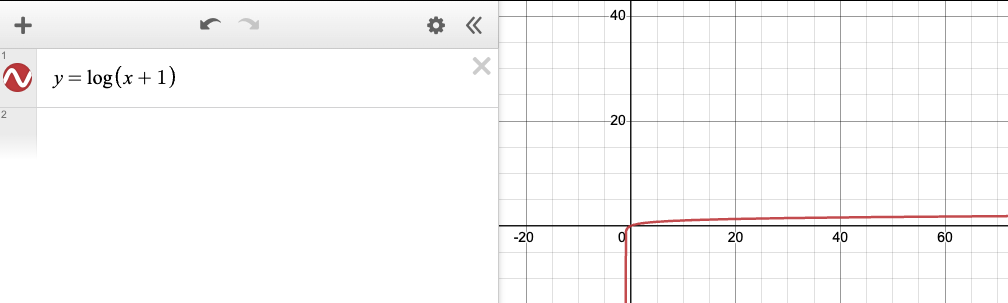

In [22]:
df["Fare"] = np.log1p(df["Fare"])

C:\Users\WOODLAC\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Frequency'>

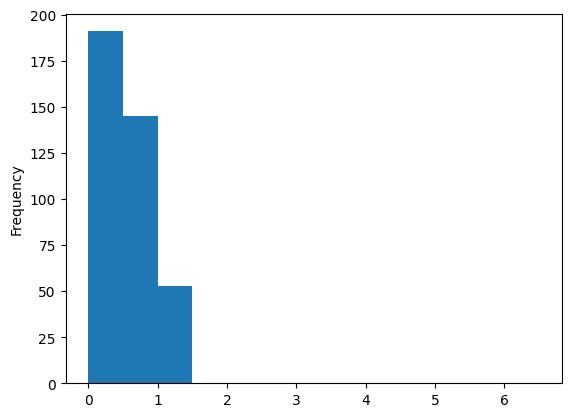

In [23]:
df["Fare"].plot(kind="hist",bins=np.arange(0,7 , 0.5))

log를 취해준 결과, 왼쪽으로 쏠림 현상이 완화되었고 값들의 범위가 좁혀졌습니다. log scale은 정말 많이 사용되는 기법이니, 꼭 기억해주세요.

### Standard Scaling & MinMax Scaling
연속형 확률 변수의 크기를 조정해주면 예측 모델이 훨씬 안정적으로 학습되며, 크게 두 가지가 있습니다.

- min-max scaling: 최소값을 0, 최대값을 1로 고정하고 그 비율을 나머지 값들에 적용. 만약 최대나 최소값이 극단적일 경우 부적합. ex) 0세 = 0, 80세=1, 20세=0.25. 
- standard scaling: 각 값에서 평균값을 빼주고 표준편차로 나눠줌.

이 외에도 다양한 방식들이 있습니다. 다만 위에서 Age와 log를 취해준 Fare 모두 대략적으로 정규분포를 따르므로 standard scaling을 적용해주겠습니다. 그 외의 SibSp, Parch, FamilySize는 min-max scaler를 사용하겠습니다.

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [45]:
standard_scaler = StandardScaler()
minmax_scaler  = MinMaxScaler()

In [46]:
df[["Age", "Fare"]] = standard_scaler.fit_transform(df[["Age","Fare"]])

In [47]:
df

,Unnamed: 0,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,1,-0.551366,0.125,0.000000,-1.543028,0.1,0,0,0,1,0,0,1
1,1,2,1,0,0.654030,0.125,0.000000,1.186047,0.1,0,1,0,0,1,0,0
2,2,3,1,0,-0.250017,0.000,0.000000,-1.070101,0.0,1,0,0,1,0,0,1
3,3,4,1,0,0.428018,0.125,0.000000,1.061859,0.1,0,0,0,1,1,0,0
4,4,5,0,1,0.428018,0.000,0.000000,-1.006984,0.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,1,-0.174680,0.000,0.000000,0.026331,0.0,1,0,0,1,0,1,0
887,887,888,1,0,-0.777378,0.000,0.000000,0.762231,0.0,1,0,0,1,1,0,0
888,888,889,0,0,-0.570201,0.125,0.333333,0.597156,0.3,0,0,0,1,0,0,1
889,889,890,1,1,-0.250017,0.000,0.000000,0.762231,0.0,1,1,0,0,1,0,0


<Axes: ylabel='Frequency'>

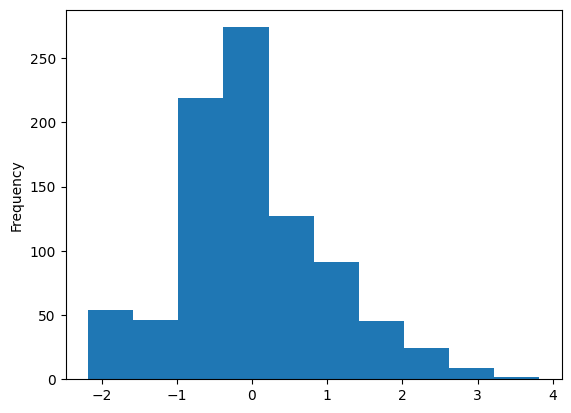

In [48]:
df["Age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

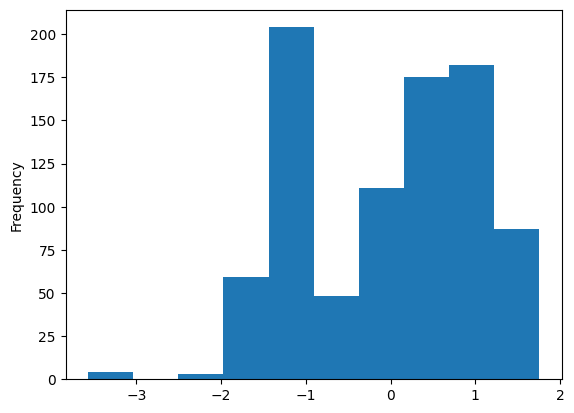

In [49]:
df["Fare"].plot(kind="hist")

In [51]:
df[["SibSp", "Parch","FamilySize"]] = minmax_scaler.fit_transform(df[["SibSp", "Parch","FamilySize"]])
df

,Unnamed: 0,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_0,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,1,-0.551366,0.125,0.000000,-1.543028,0.1,0,0,0,1,0,0,1
1,1,2,1,0,0.654030,0.125,0.000000,1.186047,0.1,0,1,0,0,1,0,0
2,2,3,1,0,-0.250017,0.000,0.000000,-1.070101,0.0,1,0,0,1,0,0,1
3,3,4,1,0,0.428018,0.125,0.000000,1.061859,0.1,0,0,0,1,1,0,0
4,4,5,0,1,0.428018,0.000,0.000000,-1.006984,0.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,1,-0.174680,0.000,0.000000,0.026331,0.0,1,0,0,1,0,1,0
887,887,888,1,0,-0.777378,0.000,0.000000,0.762231,0.0,1,0,0,1,1,0,0
888,888,889,0,0,-0.570201,0.125,0.333333,0.597156,0.3,0,0,0,1,0,0,1
889,889,890,1,1,-0.250017,0.000,0.000000,0.762231,0.0,1,1,0,0,1,0,0


<Axes: ylabel='Frequency'>

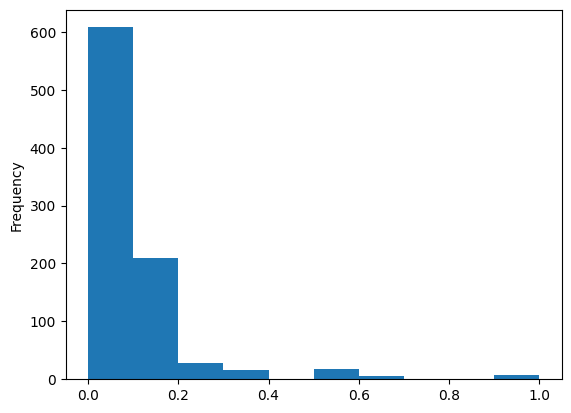

In [32]:
df["SibSp"].plot(kind="hist")

<Axes: ylabel='Frequency'>

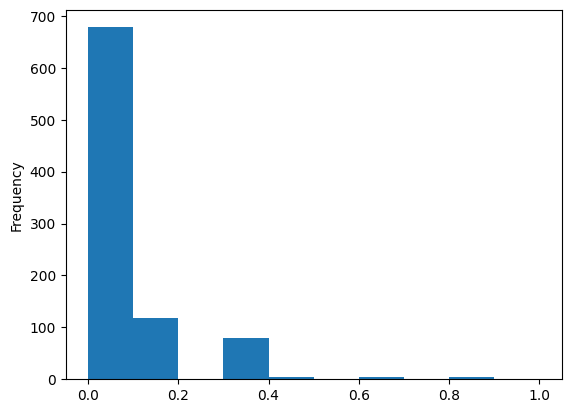

In [33]:
df["Parch"].plot(kind="hist")

<Axes: ylabel='Frequency'>

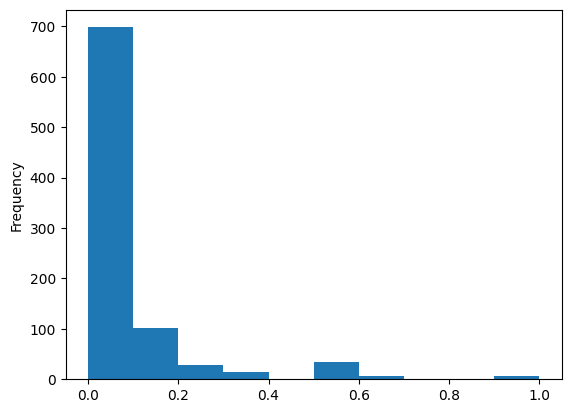

In [34]:
df["FamilySize"].plot(kind="hist")

### scaler 저장
앞서 사용한 scaler들은 train 데이터 셋에 맞게 피팅 시켜놓은 것들입니다. 이를 추후 test set에도 사용하기 위해 python pickle을 이용하여 객체의 상태를 저장하겠습니다.

In [39]:
import pickle

In [40]:
with open("./data/standard_scaler.pkl","wb") as fw:
    pickle.dump(standard_scaler,fw)

In [43]:
with open("./data/MinMaxScaler.pkl","wb") as fw:
    pickle.dump(minmax_scaler,fw)

In [42]:
df.to_csv("./data/titanic_train_preprocessed.csv", index=False,encoding="utf-8-sig")

standard scaler를 적용하면 값들의 부호가 + 혹은 -가 섞여있습니다만 이는 모델 학습시에 크게 고려하지 않아도 괜찮습니다.

누누이 말씀드리지만 정답이 정해져있는 분야가 아닙니다. Age 컬럼에 standard scaler를 적용해도 괜찮고, Fare 컬럼에 min-max scaler를 적용해도 괜찮습니다. 다른 스케일링 기법이 적합해보인다면 적용해보고, 실제로 효과가 있는지 확인해보면 됩니다. 머신러닝이라는 분야가 경험적으로 이렇게 하면 잘되더라 식으로 발전한 면이 많기 때문에 모든 것이 명확하게 딱 떨어지지 않을 수 있습니다.

## 정리
지금까지 연속형 확률변수의 전처리를 진행해보았습니다. 먼저 분포를 시각화하고, 지나치게 쏠림 현상이 있으면 log scale을 적용해주었습니다. 그 다음 standard scaler와 minmax scaler를 적용하여 값들의 범위를 조정하였습니다.

이것으로 타이타닉 생존자 데이터 셋의 전처리를 마쳤습니다. 꽤나 복잡한 과정을 거쳤는데요, 실제 코드 자체는 몇줄 되지 않습니다. 다음 챕터에서는 이를 함수로 깔끔하게 정리하고 train set과 test set을 전처리하여 저장해보겠습니다.